## Final Project Submission

Please fill out:
* Student name: Allan Ngeiywa
* Student pace: Part time

* Scheduled project review date/time: 17TH July - 24th July 2023
* Instructor name: Maryanne Mwikali
* Blog post URL: N/A


# Business Problem



Microsoft wants to join the fun as they see so many large firms producing original video content. 
hey've chosen to start a new movie company, but they have no experience making movies. 
You are expected to research the genres of movies that are currently performing the best at the box office. 
The next step is to translate your research into practical insights that the head of Microsoft's new film division can use to guide the production of particular films.

I have based my analysis based on the below questions after considering the business problem and combing through the data I obtained.

1 . Release timings that contribute to a movie success.          
2 . Month with the most movies released.                                                             
3 . Average revenue per month                                                                       
4 . Genres with the most number of movies produced.                                                   
5 . Genres that contribute to a movie success                                                         
6 . Directors that contribute to a movie success                                                     
7 .Which are the top studios we would potentially be competing against?                              
8 . Release month with the highest net profit                                                         
9 . Which are the top studios we would potentially be competing against?                             
10 . Studio with most movies                                                                          
11 . Top studio in terms of worldwide gross revenue                                                                                            
12 .Movies with the highest Profit   
13.Relationship between production_budget,worldwide_gross and Net_profit

                                                        

# Importing Data

In [117]:
#Import the libraries

import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker


List of all the datsets used.

bom.movie_gross.csv.gz'                                                                               
imdb.name.basics.csv.gz'                                                                              
imdb.title.akas.csv.gz'                                                                               
imdb.title.basics.csv.gz'                                                                            
imdb.title.crew.csv.gz'                                                                              
imdb.title.principals.csv.gz'                                                                         
imdb.title.ratings.csv.gz'                                                                           
rt.movie_info.tsv.gz'                                                                                
rt.reviews.tsv.gz'                                                                                
tmdb.movies.csv.gz'                                                                                 
tn.movie_budgets.csv.gz'


Import data sets into pandas dataframes


In [2]:
#Import bom.movie_gross.csv.gz

movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross_df.info()
movie_gross_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#import tn.movie_budgets.csv.gz

movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_budgets_df.info()
movie_budgets_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
#import rt.reviews.tsv.gz 

movie_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='cp1252')
movie_reviews_df.info()
movie_reviews_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [5]:
#Fill missing values in review, rating, critic, publisher columns with 'NaN'

movie_reviews_df['review'].fillna('NaN', inplace=True)
movie_reviews_df['rating'].fillna('NaN', inplace=True)
movie_reviews_df['critic'].fillna('NaN', inplace=True)
movie_reviews_df['publisher'].fillna('NaN', inplace=True)


movie_reviews_df.info()
movie_reviews_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      54432 non-null  object
 2   rating      54432 non-null  object
 3   fresh       54432 non-null  object
 4   critic      54432 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54432 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [6]:
#import imdb.title.principals

movie_title_principals_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
movie_title_principals_df.info()
movie_title_principals_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [7]:
#Drop job and characters columns since i will not use them

movie_title_principals_df.drop(['job', 'characters'], axis=1, inplace=True)

movie_title_principals_df.info()
movie_title_principals_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   tconst    1028186 non-null  object
 1   ordering  1028186 non-null  int64 
 2   nconst    1028186 non-null  object
 3   category  1028186 non-null  object
dtypes: int64(1), object(3)
memory usage: 31.4+ MB


,tconst,ordering,nconst,category
0,tt0111414,1,nm0246005,actor
1,tt0111414,2,nm0398271,director
2,tt0111414,3,nm3739909,producer
3,tt0323808,10,nm0059247,editor
4,tt0323808,1,nm3579312,actress


In [8]:
#import imdb.title.basics.csv.gz

movie_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
movie_title_basics_df.info()
movie_title_basics_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
#Repalce missing values with mean of runtime_minutes

movie_title_basics_df['runtime_minutes'].fillna(movie_title_basics_df.runtime_minutes.mean(), inplace=True)


In [10]:
#Fill genres and original_title missing values with 'NaN'

movie_title_basics_df['genres'].fillna('NaN', inplace=True)
movie_title_basics_df['original_title'].fillna('NaN', inplace=True)


In [11]:
#display contents of movie_title_basics_df

movie_title_basics_df.info()
movie_title_basics_df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146144 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           146144 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.000000,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,86.187247,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.000000,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,86.187247,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.000000,Biography


In [12]:
#import tmdb.movies.csv.gz

tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_movies_df.info()
tmdb_movies_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [13]:
#drop the unnamed colume

tmdb_movies_df.drop('Unnamed: 0', axis = 1,  inplace=True)

tmdb_movies_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [14]:
#change release_date to datetime format from object

tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'])

tmdb_movies_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.8+ MB


In [15]:
# import imdb.title.ratings.csv.gz

movie_title_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
movie_title_ratings_df.info()
movie_title_ratings_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [16]:
#import bom.movie_gross.csv.gz

movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross_df.info()
movie_gross_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [17]:
#filing missing values on Studio with NaN and and domestic_gross	foreign_gross	year with the median

#movie_gross_df['studio'].fillna('NaN', inplace=True)

movie_gross_df['domestic_gross'].fillna(movie_gross_df.domestic_gross.median(), inplace=True)
movie_gross_df['foreign_gross'].fillna(movie_gross_df.domestic_gross.median(), inplace=True)


In [18]:
# Replace commas with an empty string in the "foreign_gross" column

movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].str.replace(',', '')

# Convert the "foreign_gross" column to the float64 data type
#movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype('float64')

In [19]:
movie_gross_df.info()
movie_gross_df.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [20]:
#import imdb.title.crew.csv.gz

movie_title_crew_df = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
movie_title_crew_df.info()
movie_title_crew_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [21]:
#Fill missing values with 'NaN'

movie_title_crew_df.fillna('NaN', inplace=True)


In [22]:
#display contents of movie_title_crew_df

movie_title_crew_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  146144 non-null  object
 2   writers    146144 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [23]:
#import imdb.title.akas.csv.gz

movie_title_akas_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
movie_title_akas_df.info()
movie_title_akas_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [24]:
#import rt.movie_info.tsv.gz

movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', compression='gzip', sep='\t')
movie_info_df.info()
movie_info_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [25]:
#Fill all missing columns with 'NaN'

movie_info_df['synopsis'].fillna('NaN', inplace=True)
movie_info_df['genre'].fillna('NaN', inplace=True)
movie_info_df['director'].fillna('NaN', inplace=True)
movie_info_df['writer'].fillna('NaN', inplace=True)
movie_info_df['currency'].fillna('NaN', inplace=True)
movie_info_df['studio'].fillna('NaN', inplace=True)
movie_info_df['rating'].fillna('NaN', inplace=True)

In [26]:
#display contents of movie_info_df

movie_info_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1560 non-null   object
 2   rating        1560 non-null   object
 3   genre         1560 non-null   object
 4   director      1560 non-null   object
 5   writer        1560 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      1560 non-null   object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        1560 non-null   object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [27]:
#Fill theater_date, dvd_date with Dec 5 1980 box office with 000

movie_info_df['theater_date'].fillna('Dec 5, 1980', inplace=True)
movie_info_df['dvd_date'].fillna('Dec 5, 1980', inplace=True)
movie_info_df['box_office'].fillna(000, inplace=True)

#display its content

movie_info_df.info()
movie_info_df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1560 non-null   object
 2   rating        1560 non-null   object
 3   genre         1560 non-null   object
 4   director      1560 non-null   object
 5   writer        1560 non-null   object
 6   theater_date  1560 non-null   object
 7   dvd_date      1560 non-null   object
 8   currency      1560 non-null   object
 9   box_office    1560 non-null   object
 10  runtime       1530 non-null   object
 11  studio        1560 non-null   object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,0,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,0,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,0,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,"Dec 5, 1980","Dec 5, 1980",NaN,0,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,0,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,0,108 minutes,NaN


In [28]:
#Remove 'minutes' from runtime
movie_info_df['runtime'] = movie_info_df['runtime'].str.replace('minutes', '')

In [29]:


#Convert the "runtime" column to float data type
movie_info_df['runtime'] = movie_info_df['runtime'].astype('float')

#Calculate the mean of the "runtime" column
mean_runtime = movie_info_df['runtime'].mean()

#Impute missing values in the "runtime" column with the mean
movie_info_df['runtime'].fillna(mean_runtime, inplace=True)

movie_info_df.info()
movie_info_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1560 non-null   int64  
 1   synopsis      1560 non-null   object 
 2   rating        1560 non-null   object 
 3   genre         1560 non-null   object 
 4   director      1560 non-null   object 
 5   writer        1560 non-null   object 
 6   theater_date  1560 non-null   object 
 7   dvd_date      1560 non-null   object 
 8   currency      1560 non-null   object 
 9   box_office    1560 non-null   object 
 10  runtime       1560 non-null   float64
 11  studio        1560 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 146.4+ KB


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,0,104.0,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108.0,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,0,116.0,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,0,128.0,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,"Dec 5, 1980","Dec 5, 1980",NaN,0,200.0,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,0,95.0,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82.0,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123.0,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117.0,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,0,108.0,NaN


In [30]:
#import imdb.name.basics.csv.gz

movie_basics_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
movie_basics_df.info()
movie_basics_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [31]:
#Use pandas drop method to remove columns since i will not use them

movie_basics_df.drop(['birth_year', 'death_year'], axis=1, inplace=True)

In [32]:
#Display movie_basics_df

movie_basics_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   nconst              606648 non-null  object
 1   primary_name        606648 non-null  object
 2   primary_profession  555308 non-null  object
 3   known_for_titles    576444 non-null  object
dtypes: object(4)
memory usage: 18.5+ MB


In [33]:
#Fill missing data with 'NaN' 

movie_basics_df.fillna('NaN', inplace=True)
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   nconst              606648 non-null  object
 1   primary_name        606648 non-null  object
 2   primary_profession  606648 non-null  object
 3   known_for_titles    606648 non-null  object
dtypes: object(4)
memory usage: 18.5+ MB


In [34]:
movie_basics_df.isnull().sum()

nconst                0
primary_name          0
primary_profession    0
known_for_titles      0
dtype: int64

In [35]:
#Dipslay movie_budgets_df and clean it

movie_budgets_df.info()
movie_budgets_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [36]:
#Change the data type of production_budget	domestic_gross	worldwide_gross to float and remove the dollar sign.

columns_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in columns_to_convert:
    movie_budgets_df[col] = movie_budgets_df[col].replace({'\$': '', ',': ''}, regex=True).astype('float64')

In [37]:
#display movie_budgets_df

movie_budgets_df.info()
movie_budgets_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [38]:
# Convert the "release_date" column to datetime format

movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])

In [39]:
#display movie_budgets_df

movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [40]:
#check for duplicates in movie_budgets_df

duplicates = movie_budgets_df.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Length: 5782, dtype: bool

In [41]:
# Drop duplicates based on specific release_date and movies columns

movie_budgets_df.drop_duplicates(subset=['release_date', 'movie'], inplace=True)

movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 316.2+ KB


In [42]:
# checking for null values
movie_budgets_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

# DATA ANAYLTICS

1 .  Release timings that contribute to a movie success.                                              


In [127]:
#Release Date Analysis

movie_budgets_df['release_date'].value_counts()


2014-12-31    24
2015-12-31    23
2010-12-31    15
2008-12-31    14
2013-12-31    13
              ..
2018-04-27     1
1982-09-17     1
2010-02-10     1
1966-07-06     1
1977-07-13     1
Name: release_date, Length: 2418, dtype: int64

In [112]:
#Extract release month from release date

movie_budgets_df['release_month'] = movie_budgets_df['release_date'].dt.strftime('%B')

movie_budgets_df.info()
movie_budgets_df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   release_month      5782 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 521.4+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,May
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,June
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,December
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,December
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,April
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,July
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,September


2 . Month with the most movies released.

In [113]:
#Month with the most movies released

month_value_counts=movie_budgets_df['release_month'].value_counts()
month_value_counts

December     745
October      573
August       496
September    493
November     486
June         479
March        470
April        454
July         440
May          407
February     392
January      347
Name: release_month, dtype: int64

Based on my analysis of release_month, my recommendation to Microsoft was to consider releasing movies in December since most movies are released in Descember

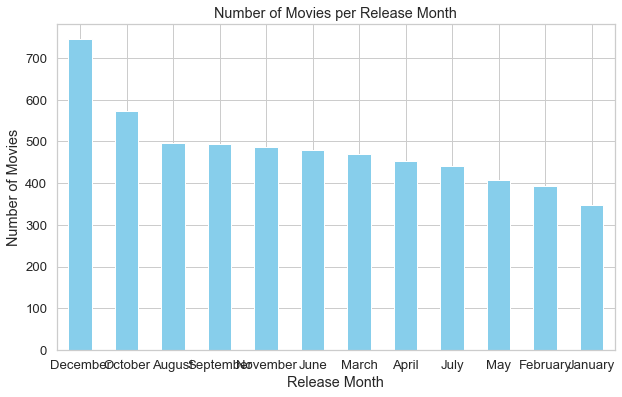

In [133]:
#Bar Plot of Number of movies released per month

plt.figure(figsize=(10, 6))
month_value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Release Month')
plt.xticks(rotation=0)
plt.show()

#plt.savefig('Images/Question2_Release_timings.png')


December had the highest number of movies released

3 . Average revenue per month

In [115]:
#Average revenue grouped by per month

month_average = movie_budgets_df[['release_month', 'worldwide_gross']]

month_average_grouped = month_average.groupby('release_month', as_index=False).mean()

month_average_grouped


,release_month,worldwide_gross
0,April,5.992026e+07
1,August,6.097841e+07
2,December,1.016932e+08
3,February,7.154453e+07
4,January,4.656382e+07
5,July,1.409636e+08
6,June,1.425230e+08
7,March,8.063337e+07
8,May,1.622680e+08
9,November,1.357416e+08


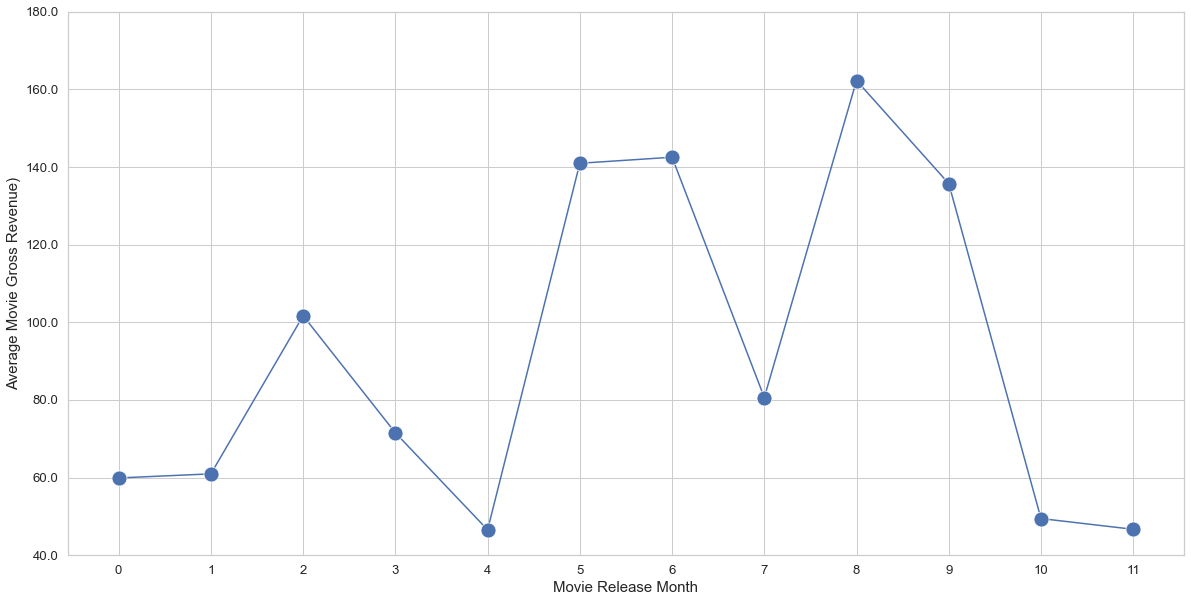

In [118]:
#Plot a line plot based on average revenue per month

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

ax = sns.lineplot(x="release_month", y="worldwide_gross", marker="o", ci=0, markersize=15, data=month_average_grouped)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(1))
plt.yticks(ax.get_yticks(), ax.get_yticks()/1000000)
plt.ylabel('Average Movie Gross Revenue)', fontsize=15)
plt.xlabel('Movie Release Month', fontsize=15)
sns.set(style='whitegrid', font_scale=1.2)
plt.show()

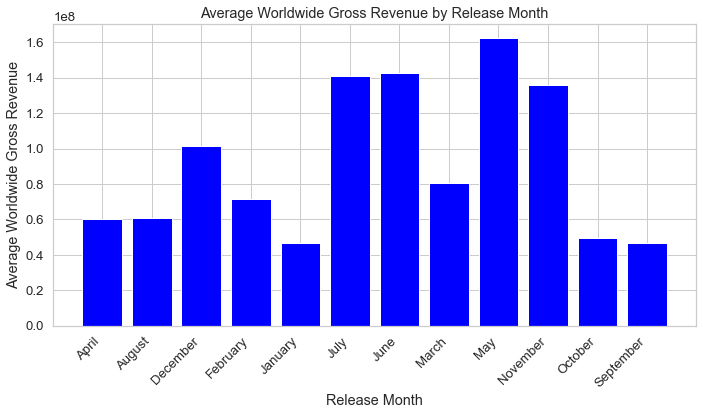

In [122]:
#Bar plot of the above

plt.figure(figsize=(10, 6))
plt.bar(month_average_grouped['release_month'], month_average_grouped['worldwide_gross'], color='blue')
plt.xlabel('Release Month')
plt.ylabel('Average Worldwide Gross Revenue') 
plt.title('Average Worldwide Gross Revenue by Release Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the two charts above, movies released in May and November had the
highest average gross revenue compared to the othe months

GENRE ANALYSIS

In [53]:
#Merge dataframes with an inner join

genres_df = movie_budgets_df.merge(movie_title_basics_df, left_on='movie', right_on='original_title', how='inner')
crew_df = genres_df.merge(movie_title_crew_df, left_on='tconst', right_on='tconst', how='inner')
merged_df = crew_df.merge(movie_basics_df, left_on='directors', right_on='nconst', how='inner')

merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3128 entries, 0 to 3127
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  3128 non-null   int64         
 1   release_date        3128 non-null   datetime64[ns]
 2   movie               3128 non-null   object        
 3   production_budget   3128 non-null   float64       
 4   domestic_gross      3128 non-null   float64       
 5   worldwide_gross     3128 non-null   float64       
 6   release_month       3128 non-null   object        
 7   tconst              3128 non-null   object        
 8   primary_title       3128 non-null   object        
 9   original_title      3128 non-null   object        
 10  start_year          3128 non-null   int64         
 11  runtime_minutes     3128 non-null   float64       
 12  genres              3128 non-null   object        
 13  directors           3128 non-null   object      

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,nconst,primary_name,primary_profession,known_for_titles
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,May,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627",nm0551128,Rob Marshall,"director,miscellaneous,producer","tt2180411,tt0299658,tt0875034,tt5028340"
1,45,2018-12-19,Mary Poppins Returns,130000000.0,171958438.0,3.415285e+08,December,tt5028340,Mary Poppins Returns,Mary Poppins Returns,2018,130.0,"Comedy,Family,Fantasy",nm0551128,"nm0871308,nm1341735,nm0551128,nm0217896",nm0551128,Rob Marshall,"director,miscellaneous,producer","tt2180411,tt0299658,tt0875034,tt5028340"
2,77,2014-12-25,Into the Woods,56200000.0,128002372.0,2.131164e+08,December,tt2180411,Into the Woods,Into the Woods,2014,125.0,"Adventure,Comedy,Drama",nm0551128,nm0487567,nm0551128,Rob Marshall,"director,miscellaneous,producer","tt2180411,tt0299658,tt0875034,tt5028340"
3,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,June,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",nm1334526,"nm0126208,nm1079208,nm1079211,nm1334526,nm0456...",nm1334526,Simon Kinberg,"producer,writer,director","tt1502712,tt3315342,tt1877832,tt3659388"
4,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",nm0923736,Joss Whedon,"writer,producer,director","tt0118276,tt0162065,tt0848228,tt1259521"


In [54]:
genres_df = genres_df[genres_df['genres'] != 'NaN']
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3473 entries, 0 to 3536
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 3473 non-null   int64         
 1   release_date       3473 non-null   datetime64[ns]
 2   movie              3473 non-null   object        
 3   production_budget  3473 non-null   float64       
 4   domestic_gross     3473 non-null   float64       
 5   worldwide_gross    3473 non-null   float64       
 6   release_month      3473 non-null   object        
 7   tconst             3473 non-null   object        
 8   primary_title      3473 non-null   object        
 9   original_title     3473 non-null   object        
 10  start_year         3473 non-null   int64         
 11  runtime_minutes    3473 non-null   float64       
 12  genres             3473 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory us

4 . Genres with the most number of movies produced.

In [123]:
# getting value counts for genre column

genre_value_counts = genres_df['genres'].value_counts()

top_10_genres = genre_value_counts.head(10)
top_10_genres

Drama                         402
Documentary                   266
Comedy                        123
Horror                         98
Comedy,Drama                   92
Comedy,Drama,Romance           81
Thriller                       78
Adventure,Animation,Comedy     74
Drama,Romance                  72
Action,Crime,Drama             59
Name: genres, dtype: int64

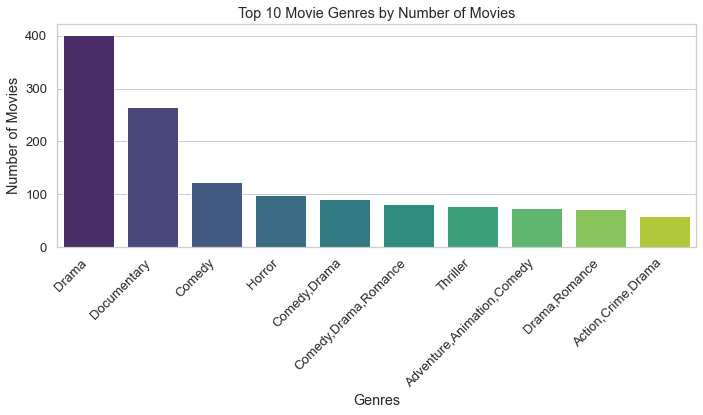

In [56]:
#Create a box plot of top_10_genres

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='viridis')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Top 10 Movie Genres by Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Drama is the most popular genre by far with a total of 402 movies.

5 . Genres that contribute to a movie success

In [58]:
#Create two new columns: gross_profit and profit_margin 

merged_df['net_profit'] = merged_df['worldwide_gross'] - movie_budgets_df['production_budget']

merged_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,nconst,primary_name,primary_profession,known_for_titles,net_profit
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,May,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627",nm0551128,Rob Marshall,"director,miscellaneous,producer","tt2180411,tt0299658,tt0875034,tt5028340",6.206639e+08
1,45,2018-12-19,Mary Poppins Returns,130000000.0,171958438.0,3.415285e+08,December,tt5028340,Mary Poppins Returns,Mary Poppins Returns,2018,130.0,"Comedy,Family,Fantasy",nm0551128,"nm0871308,nm1341735,nm0551128,nm0217896",nm0551128,Rob Marshall,"director,miscellaneous,producer","tt2180411,tt0299658,tt0875034,tt5028340",-6.907148e+07
2,77,2014-12-25,Into the Woods,56200000.0,128002372.0,2.131164e+08,December,tt2180411,Into the Woods,Into the Woods,2014,125.0,"Adventure,Comedy,Drama",nm0551128,nm0487567,nm0551128,Rob Marshall,"director,miscellaneous,producer","tt2180411,tt0299658,tt0875034,tt5028340",-1.368836e+08
3,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,June,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",nm1334526,"nm0126208,nm1079208,nm1079211,nm1334526,nm0456...",nm1334526,Simon Kinberg,"producer,writer,director","tt1502712,tt3315342,tt1877832,tt3659388",-1.808376e+08
4,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",nm0923736,Joss Whedon,"writer,producer,director","tt0118276,tt0162065,tt0848228,tt1259521",1.086014e+09
5,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,May,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0672015",nm0923736,Joss Whedon,"writer,producer,director","tt0118276,tt0162065,tt0848228,tt1259521",1.211936e+09
6,35,1998-08-14,The Avengers,60000000.0,23385416.0,4.858542e+07,August,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0672015",nm0923736,Joss Whedon,"writer,producer,director","tt0118276,tt0162065,tt0848228,tt1259521",-2.514146e+08
7,82,1993-05-07,Much Ado About Nothing,8000000.0,22549338.0,2.254934e+07,May,tt2094064,Much Ado About Nothing,Much Ado About Nothing,2012,109.0,"Comedy,Drama,Romance",nm0923736,"nm0923736,nm0000636",nm0923736,Joss Whedon,"writer,producer,director","tt0118276,tt0162065,tt0848228,tt1259521",-2.774507e+08
8,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,November,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",nm0811583,"nm0796950,nm0795975,nm0006516,nm0811583,nm0923...",nm0811583,Zack Snyder,"producer,director,writer","tt0770828,tt0451279,tt0409459,tt0416449",3.559452e+08
9,18,2016-03-25,Batman v Superman: Dawn of Justice,250000000.0,330360194.0,8.675003e+08,March,tt2975590,Batman v Superman: Dawn of Justice,Batman v Superman: Dawn of Justice,2016,151.0,"Action,Adventure,Fantasy",nm0811583,"nm0006516,nm0333060,nm0004170,nm0277730,nm0796...",nm0811583,Zack Snyder,"producer,director,writer","tt0770828,tt0451279,tt0409459,tt0416449",5.675003e+08


In [59]:
# Group the merged_df by 'genres' and calculate the sum of 'net_profit' for each genre

genres_net_profit = merged_df.groupby('genres')['net_profit'].sum()
genres_net_profit

genres
Action                        7.594794e+08
Action,Adventure              1.503564e+07
Action,Adventure,Animation    3.160350e+09
Action,Adventure,Biography    3.868259e+08
Action,Adventure,Comedy       7.093299e+09
                                  ...     
Sci-Fi,Thriller               4.606385e+06
Sport                        -2.165711e+07
Thriller                      1.148398e+09
War                           2.449227e+08
Western                      -1.299601e+08
Name: net_profit, Length: 326, dtype: float64

In [60]:
# Sort the genres based on net profit in descending order

genres_net_profit_sorted = genres_net_profit.sort_values(ascending=False)
genres_net_profit_sorted.head(20)

genres
Action,Adventure,Sci-Fi       1.909590e+10
Action,Adventure,Fantasy      7.852168e+09
Adventure,Animation,Comedy    7.149820e+09
Action,Adventure,Comedy       7.093299e+09
Adventure,Family,Fantasy      3.708605e+09
Documentary                   3.353992e+09
Action,Adventure,Animation    3.160350e+09
Action,Adventure,Thriller     2.821074e+09
Action,Adventure,Drama        2.264143e+09
Family                        1.967220e+09
Action,Thriller               1.881380e+09
Horror                        1.714058e+09
Family,Fantasy,Musical        1.567631e+09
Adventure,Fantasy             1.473632e+09
Drama                         1.464942e+09
Adventure,Comedy,Family       1.456717e+09
Action,Sci-Fi,Thriller        1.422297e+09
Action,Crime,Thriller         1.409325e+09
Comedy                        1.396776e+09
Comedy,Romance                1.328272e+09
Name: net_profit, dtype: float64

In [61]:
# Get the genres with the highest net profit

top_genres = genres_net_profit_sorted.head(20)
print(top_genres)

genres
Action,Adventure,Sci-Fi       1.909590e+10
Action,Adventure,Fantasy      7.852168e+09
Adventure,Animation,Comedy    7.149820e+09
Action,Adventure,Comedy       7.093299e+09
Adventure,Family,Fantasy      3.708605e+09
Documentary                   3.353992e+09
Action,Adventure,Animation    3.160350e+09
Action,Adventure,Thriller     2.821074e+09
Action,Adventure,Drama        2.264143e+09
Family                        1.967220e+09
Action,Thriller               1.881380e+09
Horror                        1.714058e+09
Family,Fantasy,Musical        1.567631e+09
Adventure,Fantasy             1.473632e+09
Drama                         1.464942e+09
Adventure,Comedy,Family       1.456717e+09
Action,Sci-Fi,Thriller        1.422297e+09
Action,Crime,Thriller         1.409325e+09
Comedy                        1.396776e+09
Comedy,Romance                1.328272e+09
Name: net_profit, dtype: float64


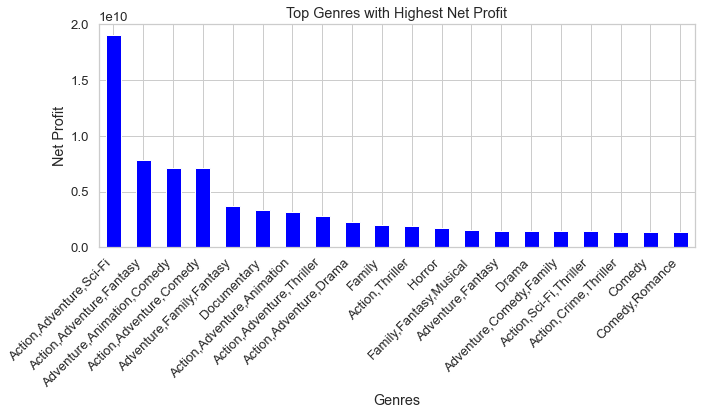

In [62]:
# Create a bar plot for the top genres with the highest net profit
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='blue')
plt.xlabel('Genres')
plt.ylabel('Net Profit')
plt.title('Top Genres with Highest Net Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Drama is the most popular genre by far with a total of 402 movies, 
based on the tow bar chats the most popular genre isn't necessarily the most successful. 
Looking at the highest average net profit per genre, Action,Adventure,Sci-Fi  wins with the highest net profit. 
My recommendation would be to choose genres based on net profit and not popularity.

6 . Directors that contribute to a movie success

In [128]:
# Group the merged_df by 'director' and calculate the sum of 'net_profit' for each director
directors_net_profit = merged_df.groupby('directors')['net_profit'].sum()

# Sort the directors based on net profit in descending order
directors_net_profit_sorted = directors_net_profit.sort_values(ascending=False)

# Get the popular directors with the highest net profit (e.g., top 10)
top_directors = directors_net_profit_sorted.head(10)

# Print the popular directors with the highest net profit
print(top_directors)

directors
nm0923736     2.368485e+09
nm0634240     2.336180e+09
nm0000881     2.263998e+09
nm0001392     2.172948e+09
nm0269463     2.163269e+09
nm1349376     2.021192e+09
nm10047650    2.008208e+09
nm0001741     1.755073e+09
nm0174374     1.667785e+09
nm0005222     1.490148e+09
Name: net_profit, dtype: float64


Director nm0001392 made the highest profits in his movies

STUDIO ANALYSIS                                                                                       

7 .Which are the top studios we would potentially be competing against? 

In [125]:
#Display Contents of movie_budgets_df and movie_gross_df
movie_budgets_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,May
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,June
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,December


In [126]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [67]:
#Number of movies released per month

movies_per_month = movie_budgets_df['release_month'].value_counts().sort_index()
#movies_per_month.head(10)
movies_per_month_sorted =movies_per_month.sort_values(ascending=False)
movies_per_month_sorted

December     745
October      573
August       496
September    493
November     486
June         479
March        470
April        454
July         440
May          407
February     392
January      347
Name: release_month, dtype: int64

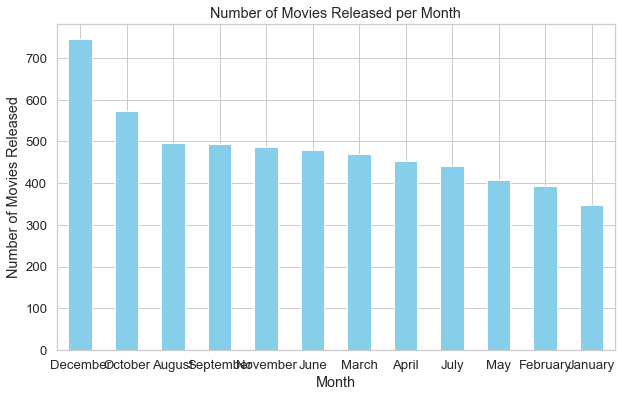

In [68]:
#Plot a bar chart of the above.

plt.figure(figsize=(10, 6))
movies_per_month_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Month')
plt.xticks(rotation=0)
plt.show()

December had the highest number of movies released

8 . Release month with the highest net profit

In [73]:
# Group the merged_df by 'release_month' and calculate the sum of 'net_profit' for each release_month
release_month_net_profit = merged_df.groupby('release_month')['net_profit'].sum()

# Sort the release_month based on net profit in descending order
release_month_net_profit_sorted = release_month_net_profit.sort_values(ascending=False)

# Get the popular release_month with the highest net profit
top_release_month = release_month_net_profit_sorted.head(10)

# Print the popular directors with the highest net profit
print(top_release_month)

release_month
June        1.860469e+10
November    1.613796e+10
May         1.456560e+10
March       1.423413e+10
December    1.230422e+10
July        1.168614e+10
February    7.285176e+09
October     3.552884e+09
August      3.480648e+09
January     3.417294e+09
Name: net_profit, dtype: float64


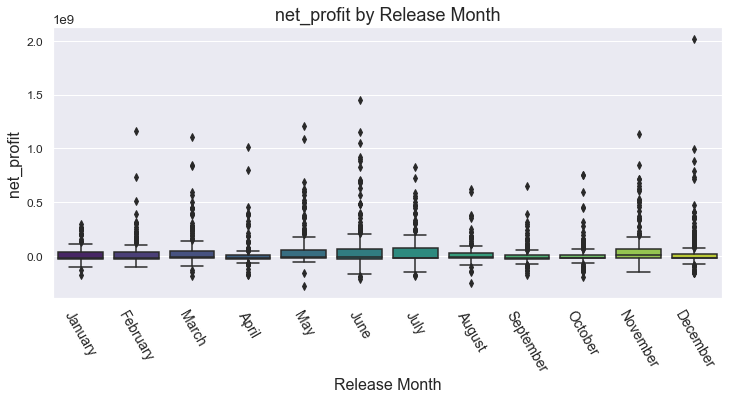

In [74]:
# generating boxplots of net_profit by release month

plt.figure(figsize=(12, 5))
sns.set_style('darkgrid')
months = ['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December']
sns.boxplot(x='release_month', y='net_profit', data=merged_df, order=months, palette='viridis')
plt.xticks(rotation=-60)
plt.ylabel('net_profit', fontsize=16)
plt.xlabel('Release Month', fontsize = 16)
plt.title('net_profit by Release Month', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12);

Based on net_profit per release month , June, November, and may seemed to be the most profitable months with the highest net_profit value for world box office net_profit

9 . Which are the top studios we would potentially be competing against

In [75]:
#Combine movie_budgets_df and movie_gross_df on movie titles

studios_df = movie_budgets_df.merge(movie_gross_df, left_on='movie', right_on='title', how='inner')

studios_df.info()
studios_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1247 non-null   int64         
 1   release_date       1247 non-null   datetime64[ns]
 2   movie              1247 non-null   object        
 3   production_budget  1247 non-null   float64       
 4   domestic_gross_x   1247 non-null   float64       
 5   worldwide_gross    1247 non-null   float64       
 6   release_month      1247 non-null   object        
 7   title              1247 non-null   object        
 8   studio             1246 non-null   object        
 9   domestic_gross_y   1247 non-null   float64       
 10  foreign_gross      1086 non-null   object        
 11  year               1247 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 126.6+ KB


,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,release_month,title,studio,domestic_gross_y,foreign_gross,year
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,May,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,April,Avengers: Infinity War,BV,678800000.0,1369.5,2018
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,November,Justice League,WB,229000000.0,428900000,2017
4,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,November,Spectre,Sony,200100000.0,680600000,2015
5,11,2012-07-20,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,July,The Dark Knight Rises,WB,448100000.0,636800000,2012
6,12,2018-05-25,Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,May,Solo: A Star Wars Story,BV,213800000.0,179200000,2018
7,13,2013-07-02,The Lone Ranger,275000000.0,89302115.0,2.600021e+08,July,The Lone Ranger,BV,89300000.0,171200000,2013
8,14,2012-03-09,John Carter,275000000.0,73058679.0,2.827781e+08,March,John Carter,BV,73100000.0,211100000,2012
9,15,2010-11-24,Tangled,260000000.0,200821936.0,5.864772e+08,November,Tangled,BV,200800000.0,391000000,2010


In [76]:
#Drop rows with studio = 'NaN'

#studios_df = studios_df[studios_df['studio'] != 'NAN']

studios_df = studios_df.drop(studios_df[studios_df['studio'] == 'NAN'].index)
studios_df.info()
studios_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1247 non-null   int64         
 1   release_date       1247 non-null   datetime64[ns]
 2   movie              1247 non-null   object        
 3   production_budget  1247 non-null   float64       
 4   domestic_gross_x   1247 non-null   float64       
 5   worldwide_gross    1247 non-null   float64       
 6   release_month      1247 non-null   object        
 7   title              1247 non-null   object        
 8   studio             1246 non-null   object        
 9   domestic_gross_y   1247 non-null   float64       
 10  foreign_gross      1086 non-null   object        
 11  year               1247 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 166.6+ KB


,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,release_month,title,studio,domestic_gross_y,foreign_gross,year
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,May,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,April,Avengers: Infinity War,BV,678800000.0,1369.5,2018
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,November,Justice League,WB,229000000.0,428900000,2017
4,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,November,Spectre,Sony,200100000.0,680600000,2015
5,11,2012-07-20,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,July,The Dark Knight Rises,WB,448100000.0,636800000,2012
6,12,2018-05-25,Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,May,Solo: A Star Wars Story,BV,213800000.0,179200000,2018
7,13,2013-07-02,The Lone Ranger,275000000.0,89302115.0,2.600021e+08,July,The Lone Ranger,BV,89300000.0,171200000,2013
8,14,2012-03-09,John Carter,275000000.0,73058679.0,2.827781e+08,March,John Carter,BV,73100000.0,211100000,2012
9,15,2010-11-24,Tangled,260000000.0,200821936.0,5.864772e+08,November,Tangled,BV,200800000.0,391000000,2010


In [79]:
studios_df['net_profit'] = studios_df['worldwide_gross'] - studios_df['production_budget']

studios_df.head(10)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,release_month,title,studio,domestic_gross_y,foreign_gross,year,net_profit
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,May,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011,6.350639e+08
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,1.072414e+09
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,April,Avengers: Infinity War,BV,678800000.0,1369.5,2018,1.748134e+09
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,November,Justice League,WB,229000000.0,428900000,2017,3.559452e+08
4,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,November,Spectre,Sony,200100000.0,680600000,2015,5.796209e+08
5,11,2012-07-20,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,July,The Dark Knight Rises,WB,448100000.0,636800000,2012,8.094391e+08
6,12,2018-05-25,Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,May,Solo: A Star Wars Story,BV,213800000.0,179200000,2018,1.181513e+08
7,13,2013-07-02,The Lone Ranger,275000000.0,89302115.0,2.600021e+08,July,The Lone Ranger,BV,89300000.0,171200000,2013,-1.499788e+07
8,14,2012-03-09,John Carter,275000000.0,73058679.0,2.827781e+08,March,John Carter,BV,73100000.0,211100000,2012,7.778100e+06
9,15,2010-11-24,Tangled,260000000.0,200821936.0,5.864772e+08,November,Tangled,BV,200800000.0,391000000,2010,3.264772e+08


In [80]:
# getting mean and median world gross amounts by studio

studio_stats = studios_df.groupby('studio')['worldwide_gross'].agg(['median', 'mean'])
studio_stats.sort_values(by='mean', ascending=False)

,median,mean
studio,,
P/DW,524929234.5,5.078028e+08
BV,275137196.5,4.623058e+08
GrtIndia,263502914.0,2.635029e+08
Fox,166785054.0,2.435983e+08
Sony,180694801.0,2.378623e+08
...,...,...
IVP,102645.0,1.026450e+05
KE,94953.0,9.495300e+04
First,85527.0,8.552700e+04


Studio With the highest Net profit

In [83]:
#Sort studios_df to display the top 10 studios with highest profit

sorted_studios_df = studios_df.sort_values(by='net_profit', ascending=False)
sorted_studios_df.head(10)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,release_month,title,studio,domestic_gross_y,foreign_gross,year,net_profit
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,April,Avengers: Infinity War,BV,678800000.0,1369.5,2018,1.748134e+09
21,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,June,Jurassic World,Uni.,652300000.0,1019.4,2015,1.433855e+09
40,67,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,April,Furious 7,Uni.,353000000.0,1163.0,2015,1.328723e+09
25,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,February,Black Panther,BV,700100000.0,646900000,2018,1.148258e+09
65,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,June,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018,1.135773e+09
91,56,2013-11-22,Frozen,150000000.0,400738009.0,1.272470e+09,November,Frozen,BV,400700000.0,875700000,2013,1.122470e+09
250,73,2015-07-10,Minions,74000000.0,336045770.0,1.160336e+09,July,Minions,Uni.,336000000.0,823400000,2015,1.086336e+09
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,1.072414e+09
26,44,2018-06-15,Incredibles 2,200000000.0,608581744.0,1.242521e+09,June,Incredibles 2,BV,608600000.0,634200000,2018,1.042521e+09
30,48,2013-05-03,Iron Man 3,200000000.0,408992272.0,1.215392e+09,May,Iron Man 3,BV,409000000.0,805800000,2013,1.015392e+09


In [87]:
# top_10_studios_pofit_net

studio_net_profit = studios_df.groupby('studio')['net_profit'].sum().sort_values(ascending=False)
top_10_studios_pofit_net = studio_net_profit.head(10)
top_10_studios_pofit_net

studio
BV         2.383522e+10
Uni.       2.073159e+10
Fox        1.904031e+10
WB         1.399611e+10
Sony       1.255131e+10
Par.       9.668207e+09
WB (NL)    6.392264e+09
LGF        4.914001e+09
P/DW       3.744028e+09
LG/S       2.157575e+09
Name: net_profit, dtype: float64

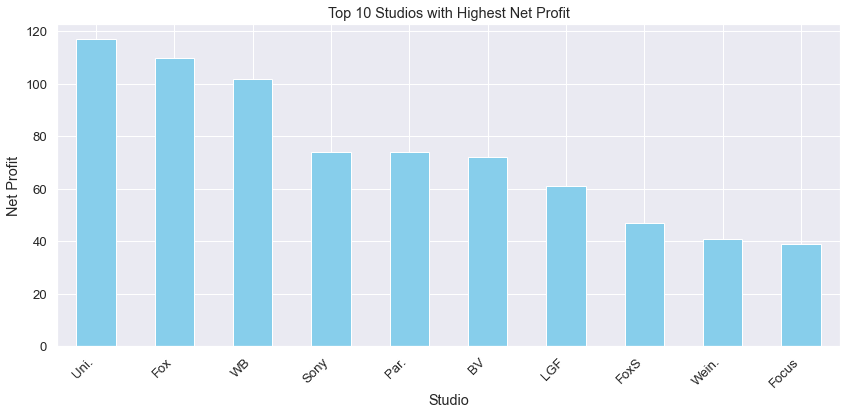

In [88]:
plt.figure(figsize=(12, 6))
top_10_studios.plot(kind='bar', color='skyblue')
plt.xlabel('Studio')
plt.ylabel('Net Profit')
plt.title('Top 10 Studios with Highest Net Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The plot above clearly shows top 10 competitors in the movie industry based on average net profit. 
BV neing the studio thats making the highest profit
These are the studios that we should look to compete against

In [ ]:
10 . Studio with most movies

In [86]:
# getting value counts for studio column

studio_value_counts = studios_df['studio'].value_counts()

#Select the top 10 studios

top_10_studios = studio_value_counts.head(10)
top_10_studios

Uni.     117
Fox      110
WB       102
Sony      74
Par.      74
BV        72
LGF       61
FoxS      47
Wein.     41
Focus     39
Name: studio, dtype: int64

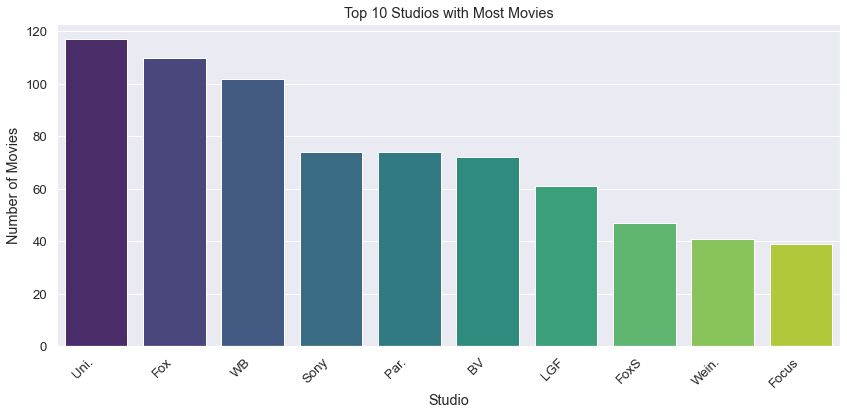

In [89]:
#Plot the top_10_studios by movies produced

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_studios.index, y=top_10_studios.values, palette='viridis')
plt.xlabel('Studio')
plt.ylabel('Number of Movies')
plt.title('Top 10 Studios with Most Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Universal, Fox, and  WB are the top three studios with over 100 movies each. 
Based on the amount of movies made, they could be potential competitors.

11 . Top studio in terms of worldwide gross revenue

In [92]:
# top studio in terms of worldwide gross revenue

studio_stats2 = studios_df.groupby('studio')['worldwide_gross'].agg(['sum'])
studio_stats2.sort_values(by='sum', ascending=False)

studio_stats2.head(10)

,sum
studio,
3D,16515203.0
A24,400005443.0
ALP,2923959.0
ATO,2272186.0
Affirm,31471492.0
Alc,161097.0
Amazon,7034615.0
Anch.,32415497.0
Annapurna,107566490.0


In [93]:
# top studio in terms of production_budget

studio_stats3 = studios_df.groupby('studio')['production_budget'].agg(['sum'])
studio_stats3.sort_values(by='sum', ascending=False)

studio_stats3.head(10)

,sum
studio,
3D,5000000.0
A24,143100000.0
ALP,26000000.0
ATO,12500000.0
Affirm,7000000.0
Alc,10000000.0
Amazon,20000000.0
Anch.,88250000.0
Annapurna,119000000.0


In [95]:
merged_df.sort_values(by='net_profit', ascending=False, inplace=True)
merged_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,nconst,primary_name,primary_profession,known_for_titles,net_profit
70,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,December,tt8852130,Titanic,Titanic,2018,115.0,Family,nm10047650,nm10047650,nm10047650,Ravi Punj,"director,writer,producer",tt8852130,2.018208e+09
46,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,June,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm1119880,Colin Trevorrow,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",1.448855e+09
5,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,May,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0672015",nm0923736,Joss Whedon,"writer,producer,director","tt0118276,tt0162065,tt0848228,tt1259521",1.211936e+09
67,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,February,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",nm3363032,"nm3363032,nm1963288,nm0498278,nm0456158",nm3363032,Ryan Coogler,"director,writer,producer","tt1825683,tt6343314,tt2334649,tt3076658",1.158258e+09
162,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,June,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",nm1291105,"nm2081046,nm1119880,nm0000341",nm1291105,J.A. Bayona,"director,writer,actor","tt1649419,tt0464141,tt3416532,tt4881806",1.155773e+09
210,56,2013-11-22,Frozen,150000000.0,400738009.0,1.272470e+09,November,tt1323045,Frozen,Frozen,2010,93.0,"Adventure,Drama,Sport",nm1697112,nm1697112,nm1697112,Adam Green,"writer,producer,director","tt1323045,tt0422401,tt4727692,tt2014681",1.132470e+09
191,35,2017-03-17,Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,March,tt2771200,Beauty and the Beast,Beauty and the Beast,2017,129.0,"Family,Fantasy,Musical",nm0174374,"nm0154716,nm0818746,nm0941314,nm0207305,nm3343855",nm0174374,Bill Condon,"director,writer,producer","tt0362269,tt0443489,tt0120684,tt0299658",1.109200e+09
4,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",nm0923736,Joss Whedon,"writer,producer,director","tt0118276,tt0162065,tt0848228,tt1259521",1.086014e+09
71,44,2018-06-15,Incredibles 2,200000000.0,608581744.0,1.242521e+09,June,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",nm0083348,nm0083348,nm0083348,Brad Bird,"miscellaneous,writer,director","tt0129167,tt3606756,tt0317705,tt0382932",1.052521e+09
30,23,2017-04-14,The Fate of the Furious,250000000.0,225764765.0,1.234846e+09,April,tt4630562,The Fate of the Furious,The Fate of the Furious,2017,136.0,"Action,Crime,Thriller",nm0336620,"nm0860155,nm0604555",nm0336620,F. Gary Gray,"director,actor,producer","tt0120768,tt0117603,tt0113118,tt0317740",1.014846e+09


12 .Movies with the highest Profit

In [96]:
#Create two new columns: gross_profit and profit_margin 

merged_df['net_profit'] = merged_df['worldwide_gross'] - merged_df['production_budget']

merged_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,nconst,primary_name,primary_profession,known_for_titles,net_profit
70,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,December,tt8852130,Titanic,Titanic,2018,115.0,Family,nm10047650,nm10047650,nm10047650,Ravi Punj,"director,writer,producer",tt8852130,2.008208e+09
46,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,June,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm1119880,Colin Trevorrow,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",1.433855e+09
5,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,May,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0672015",nm0923736,Joss Whedon,"writer,producer,director","tt0118276,tt0162065,tt0848228,tt1259521",1.292936e+09
67,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,February,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",nm3363032,"nm3363032,nm1963288,nm0498278,nm0456158",nm3363032,Ryan Coogler,"director,writer,producer","tt1825683,tt6343314,tt2334649,tt3076658",1.148258e+09
162,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,June,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",nm1291105,"nm2081046,nm1119880,nm0000341",nm1291105,J.A. Bayona,"director,writer,actor","tt1649419,tt0464141,tt3416532,tt4881806",1.135773e+09
210,56,2013-11-22,Frozen,150000000.0,400738009.0,1.272470e+09,November,tt1323045,Frozen,Frozen,2010,93.0,"Adventure,Drama,Sport",nm1697112,nm1697112,nm1697112,Adam Green,"writer,producer,director","tt1323045,tt0422401,tt4727692,tt2014681",1.122470e+09
191,35,2017-03-17,Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,March,tt2771200,Beauty and the Beast,Beauty and the Beast,2017,129.0,"Family,Fantasy,Musical",nm0174374,"nm0154716,nm0818746,nm0941314,nm0207305,nm3343855",nm0174374,Bill Condon,"director,writer,producer","tt0362269,tt0443489,tt0120684,tt0299658",1.099200e+09
4,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",nm0923736,Joss Whedon,"writer,producer,director","tt0118276,tt0162065,tt0848228,tt1259521",1.072414e+09
71,44,2018-06-15,Incredibles 2,200000000.0,608581744.0,1.242521e+09,June,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",nm0083348,nm0083348,nm0083348,Brad Bird,"miscellaneous,writer,director","tt0129167,tt3606756,tt0317705,tt0382932",1.042521e+09
30,23,2017-04-14,The Fate of the Furious,250000000.0,225764765.0,1.234846e+09,April,tt4630562,The Fate of the Furious,The Fate of the Furious,2017,136.0,"Action,Crime,Thriller",nm0336620,"nm0860155,nm0604555",nm0336620,F. Gary Gray,"director,actor,producer","tt0120768,tt0117603,tt0113118,tt0317740",9.848463e+08


In [97]:
#Sort the data in descending order of profit

sorted_movies_by_net_profit = merged_df.sort_values(by='net_profit', ascending=False)

top_movies_by_net_profit = sorted_movies_by_net_profit.head(10)
top_movies_by_net_profit.head(10)

#Print the top movies with the highest net_profit
print("Top 10 Movies with the Highest Net Profit:")
print(top_movies_by_net_profit[['movie', 'release_month', 'net_profit']])

Top 10 Movies with the Highest Net Profit:
                              movie release_month    net_profit
70                          Titanic      December  2.008208e+09
46                   Jurassic World          June  1.433855e+09
5                      The Avengers           May  1.292936e+09
67                    Black Panther      February  1.148258e+09
162  Jurassic World: Fallen Kingdom          June  1.135773e+09
210                          Frozen      November  1.122470e+09
191            Beauty and the Beast         March  1.099200e+09
4           Avengers: Age of Ultron           May  1.072414e+09
71                    Incredibles 2          June  1.042521e+09
194                         Aquaman      December  9.868946e+08


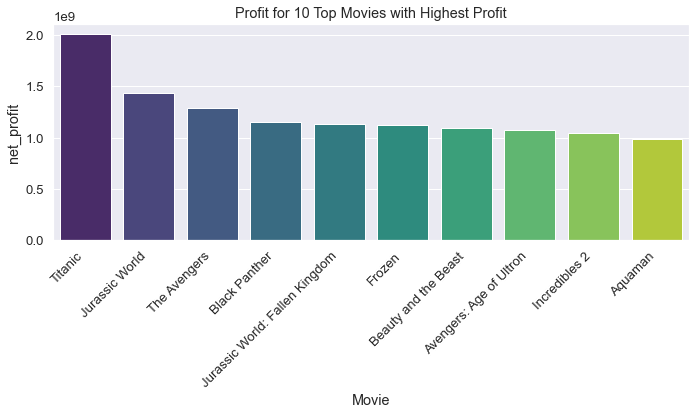

In [98]:
#Create a bar plot of Top 10 Movies with the Highest Net Profit

plt.figure(figsize=(10, 6))
sns.barplot(x='movie', y='net_profit', data=top_movies_by_net_profit, palette='viridis')
plt.xlabel('Movie')
plt.ylabel('net_profit')
plt.title('Profit for 10 Top Movies with Highest Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Titanic movies made the highest net profit

13. Relationship between production_budget,worldwide_gross and Net_profit

In [107]:
# Calculation of the average production budget and Worldwide Gross Revenue

average_production_budget = movie_budgets_df['production_budget'].mean()

average_worldwide_gross = movie_budgets_df['worldwide_gross'].mean()


print("Average Worldwide Gross Revenue:", average_worldwide_gross)

print("Average Production Budget:", average_production_budget)

Average Worldwide Gross Revenue: 91487460.90643376
Average Production Budget: 31587757.0965064


In [99]:
corr1 = movie_budgets_df.corr()
corr1

,id,production_budget,domestic_gross,worldwide_gross
id,1.000000,-0.035278,0.008255,-0.009422
production_budget,-0.035278,1.000000,0.685682,0.748306
domestic_gross,0.008255,0.685682,1.000000,0.938853
worldwide_gross,-0.009422,0.748306,0.938853,1.000000


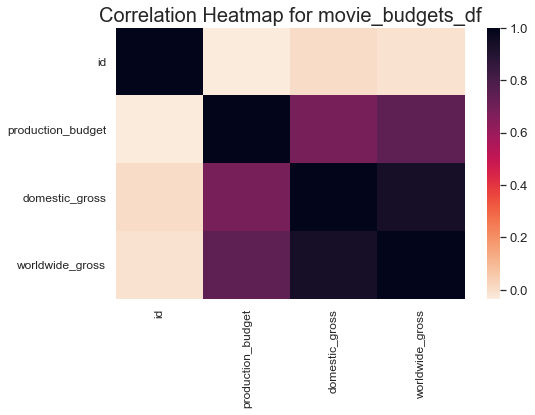

In [101]:
# plotting heatmap of correlations

plt.figure(figsize=(8,6))
plt.title("Correlation Heatmap for movie_budgets_df", fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
sns.heatmap(corr1, cmap='rocket_r');

plt.tight_layout()
plt.show()

In [108]:
#Calculate the correlation between the movie's budget and net profit

correlation_ = merged_df['production_budget'].corr(merged_df['net_profit'])
                                                                       
#correlation coefficient
                                                                          
print("Correlation between Production Budget and Net Profit:", correlation_)                                                                          

Correlation between Production Budget and Net Profit: 0.609145872171943


This means that there is a tendency for movies with higher production budgets to achieve higher net profits, and movies with lower production budgets may have relatively lower net profits.

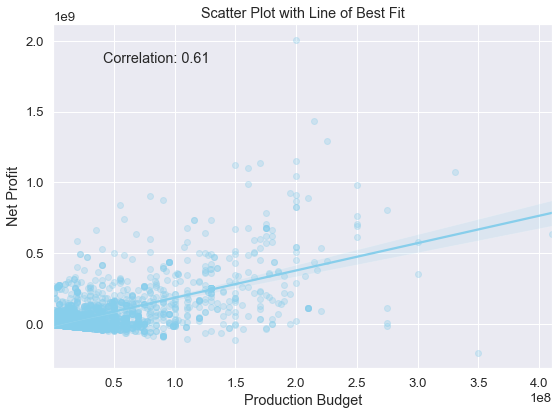

In [109]:
#Create a scatter plot with a line of best fit
plt.figure(figsize=(8, 6))
sns.regplot(x='production_budget', y='net_profit', data=merged_df, scatter_kws={'alpha':0.3}, color='skyblue')

# Set the title and labels for the plot
plt.title("Scatter Plot with Line of Best Fit")
plt.xlabel("Production Budget")
plt.ylabel("Net Profit")

# Show the correlation coefficient on the plot
plt.text(0.1, 0.9, f"Correlation: {correlation_:.2f}", ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.tight_layout()
plt.show()

The regression line in this plot shows the general increase in movie Net Profit as the budget increases.
This plot confirmed my hypothesis that a higher production budget typically leads to a higher box office profit.